In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib에서 한글이 깨지지 않도록)
plt.rc('font', family='Malgun Gothic')

# 데이터 읽기
df = pd.read_csv('netflix_titles.csv')

# 데이터 기본 정보 확인
print("데이터 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())

# 컬럼 정보 확인
print("\n데이터 정보:")
print(df.info())

# 기본 통계 정보
print("\n기술 통계량:")
print(df.describe())

# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())

데이터 크기: (8807, 12)

처음 5개 행:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


In [2]:
# 각 컬럼별 결측치 상세 분석
print("=== 컬럼별 결측치 상세 분석 ===\n")

# director 컬럼 (2634개 결측)
print("[director 컬럼 결측치 분석]")
print("총 결측치:", df['director'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['director'].isnull()]['type'].value_counts())
print("\n")

# cast 컬럼 (825개 결측)
print("[cast 컬럼 결측치 분석]")
print("총 결측치:", df['cast'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['cast'].isnull()]['type'].value_counts())
print("\n")

# country 컬럼 (831개 결측)
print("[country 컬럼 결측치 분석]")
print("총 결측치:", df['country'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['country'].isnull()]['type'].value_counts())
print("\n")

# date_added 컬럼 (10개 결측)
print("[date_added 컬럼 결측치 분석]")
print("총 결측치:", df['date_added'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['date_added'].isnull()]['type'].value_counts())
print("\n")

# rating 컬럼 (4개 결측)
print("[rating 컬럼 결측치 분석]")
print("총 결측치:", df['rating'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['rating'].isnull()]['type'].value_counts())
print("\n")

# duration 컬럼 (3개 결측)
print("[duration 컬럼 결측치 분석]")
print("총 결측치:", df['duration'].isnull().sum())
print("결측치가 있는 데이터의 type 분포:")
print(df[df['duration'].isnull()]['type'].value_counts())

=== 컬럼별 결측치 상세 분석 ===

[director 컬럼 결측치 분석]
총 결측치: 2634
결측치가 있는 데이터의 type 분포:
type
TV Show    2446
Movie       188
Name: count, dtype: int64


[cast 컬럼 결측치 분석]
총 결측치: 825
결측치가 있는 데이터의 type 분포:
type
Movie      475
TV Show    350
Name: count, dtype: int64


[country 컬럼 결측치 분석]
총 결측치: 831
결측치가 있는 데이터의 type 분포:
type
Movie      440
TV Show    391
Name: count, dtype: int64


[date_added 컬럼 결측치 분석]
총 결측치: 10
결측치가 있는 데이터의 type 분포:
type
TV Show    10
Name: count, dtype: int64


[rating 컬럼 결측치 분석]
총 결측치: 4
결측치가 있는 데이터의 type 분포:
type
Movie      2
TV Show    2
Name: count, dtype: int64


[duration 컬럼 결측치 분석]
총 결측치: 3
결측치가 있는 데이터의 type 분포:
type
Movie    3
Name: count, dtype: int64


In [3]:
# rating 컬럼의 정보 확인
print("=== Rating 컬럼 정보 ===\n")
print(df['rating'].value_counts(dropna=False))


=== Rating 컬럼 정보 ===

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64


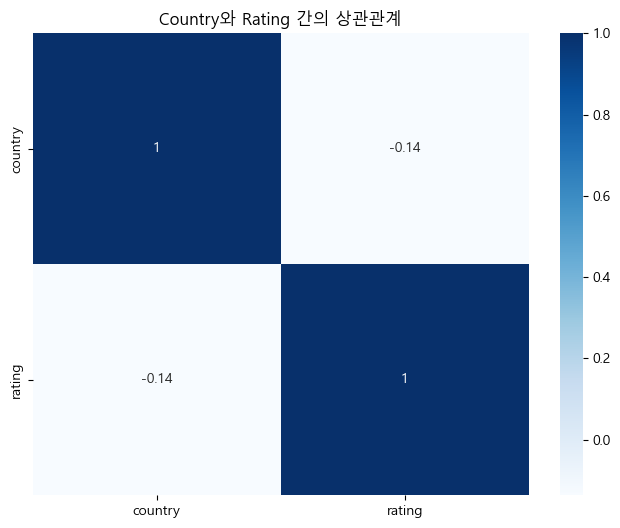

In [5]:
import seaborn as sns

# 결측치가 있는 country와 rating 컬럼을 선택하여 데이터프레임 생성
country_rating_data = df[['country', 'rating']].dropna()

# 'country'와 'rating'을 숫자형으로 인코딩하여 상관관계 분석
country_rating_data_encoded = country_rating_data.copy()
country_rating_data_encoded['country'] = country_rating_data['country'].astype('category').cat.codes
country_rating_data_encoded['rating'] = country_rating_data['rating'].astype('category').cat.codes

# 상관관계 행렬 계산
correlation_matrix = country_rating_data_encoded.corr()

# 'country'와 'rating' 간의 관계를 시각화하기 위한 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Country와 Rating 간의 상관관계')
plt.show()

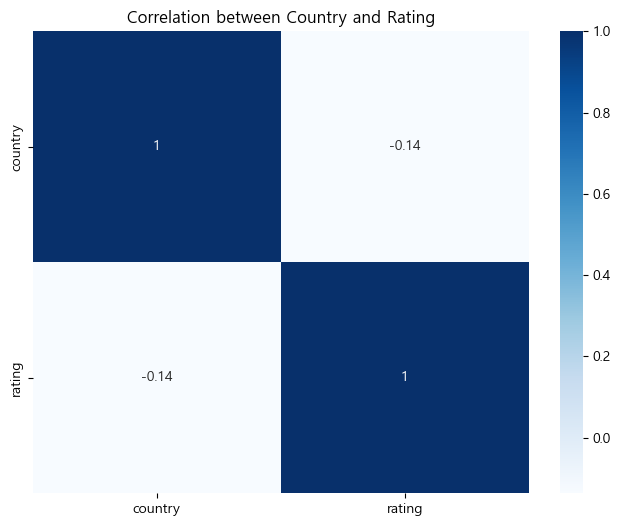

In [7]:
# Re-attempting the correlation analysis visualization
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure matplotlib is imported for plotting

# Dropping countries with missing values to avoid inconsistencies in analysis
country_rating_data = df[['country', 'rating']].dropna()  # Use df instead of netflix_data

# Encoding 'country' and 'rating' to numeric values for correlation analysis
country_rating_data_encoded = country_rating_data.copy()
country_rating_data_encoded['country'] = country_rating_data['country'].astype('category').cat.codes
country_rating_data_encoded['rating'] = country_rating_data['rating'].astype('category').cat.codes

# Calculating the correlation matrix
correlation_matrix = country_rating_data_encoded.corr()

# Plotting the correlation heatmap to visualize the relationship between 'country' and 'rating'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation between Country and Rating')
plt.show()


In [11]:
# 결측치가 있는 행을 제거한 후 'date_added' 컬럼에서 2019년 이후의 데이터를 필터링
df_cleaned = df.dropna(subset=['date_added'])  # 'date_added' 컬럼의 결측치 제거

# 'date_added'에서 2019년이 포함된 데이터 필터링
netflix_data_post_2019 = df_cleaned[df_cleaned['date_added'].str.contains('2019')]

In [12]:
# Filtering data for entries added from 2019 onwards
netflix_data_post_2019 = df[df['date_added'].str.contains('2019')]

# Classifying ratings into two categories: 'Family Friendly' and 'Mature Content'
def classify_rating(rating):
    if rating in family_friendly_ratings:
        return 'Family Friendly'
    elif rating in mature_content_ratings:
        return 'Mature Content'
    else:
        return 'Other'

netflix_data_post_2019['rating_category'] = netflix_data_post_2019['rating'].apply(classify_rating)

# Grouping data by 'country' and 'rating_category' to get counts for each rating category by country
country_rating_category_counts = netflix_data_post_2019.groupby(['country', 'rating_category']).size().unstack(fill_value=0)

# Selecting the top 10 countries based on total number of titles for better visualization
top_countries_post_2019 = country_rating_category_counts.sum(axis=1).nlargest(10).index
country_rating_category_counts_top = country_rating_category_counts.loc[top_countries_post_2019]

# Plotting the stacked bar chart for 'Family Friendly' vs 'Mature Content' for the top 10 countries
country_rating_category_counts_top.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Country-wise Distribution of Family Friendly vs Mature Content (2019 onwards)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Rating Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ValueError: Cannot mask with non-boolean array containing NA / NaN values